In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("Commodities2010-2022.csv", sep = ",", encoding = "ISO-8859-1")

In [16]:
df.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code
0,Afghanistan,2019,"Horses; live, pure-bred breeding animals",Import,2771401.40,NaN,Number of items,3000.0,1
1,Afghanistan,2019,"Cattle; live, pure-bred breeding animals",Import,125124.62,36284.298,Number of items,129.0,1
2,Afghanistan,2019,"Bovine animals; live, other than cattle and bu...",Import,1182039.21,NaN,Number of items,761.0,1
3,Afghanistan,2019,Sheep; live,Import,35961.71,12487.582,Number of items,325.0,1
4,Afghanistan,2019,Sheep; live,Export,34643.50,12551.727,Number of items,360.0,1


#3 principais commodities


In [18]:
dados_brasil = df[df['Country or Area'] == 'Brazil']
dados_brasil

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity,code
11762,Brazil,2022,"Horses; live, pure-bred breeding animals",Export,4608118.0,8.364700e+04,No Quantity,NaN,1
11763,Brazil,2022,"Horses; live, pure-bred breeding animals",Import,5776058.0,8.211000e+04,Number of items,186.0,1
11764,Brazil,2022,"Horses; live, other than pure-bred breeding an...",Export,4214048.0,1.322066e+05,No Quantity,NaN,1
11765,Brazil,2022,"Horses; live, other than pure-bred breeding an...",Import,3234706.0,4.940000e+04,Number of items,104.0,1
11766,Brazil,2022,Asses; live,Export,12111.0,NaN,No Quantity,NaN,1
...,...,...,...,...,...,...,...,...,...
527551,Brazil,2010,"Vegetable roots and tubers; manioc (cassava), ...",Export,53804.0,7.320400e+04,Weight in kilograms,15752.0,7
527552,Brazil,2010,"Vegetable roots and tubers; manioc (cassava), ...",Import,2218771.0,2.528657e+07,Weight in kilograms,25286570.0,7
527553,Brazil,2010,"Vegetable roots and tubers; sweet potatoes, wi...",Export,1969168.0,2.905878e+06,Weight in kilograms,1522272.0,7
527554,Brazil,2010,"Vegetable roots and tubers; arrowroot, salep, ...",Import,730466.0,4.419810e+05,Weight in kilograms,441981.0,7


In [19]:
# Agrupar os dados por commodity, fluxo e calcular o valor total do comércio para cada uma
commodities_agrupadas = dados_brasil.groupby(['Commodity', 'Flow'])['Trade (USD)'].sum()

# Resetar o índice para facilitar a manipulação
commodities_agrupadas = commodities_agrupadas.reset_index()

# Separar os dados de exportação e importação
exportacoes = commodities_agrupadas[commodities_agrupadas['Flow'] == 'Export']
importacoes = commodities_agrupadas[commodities_agrupadas['Flow'] == 'Import']

# Obter as 3 principais commodities exportadas e importadas
top_3_exportacoes = exportacoes.nlargest(3, 'Trade (USD)')
top_3_importacoes = importacoes.nlargest(3, 'Trade (USD)')

print("As 3 principais commodities exportadas do Brasil:")
print(top_3_exportacoes)

print("\nAs 3 principais commodities importadas para o Brasil:")
print(top_3_importacoes)

As 3 principais commodities exportadas do Brasil:
                                             Commodity    Flow   Trade (USD)
578     Meat; of bovine animals, boneless cuts, frozen  Export  8.493959e+10
557  Meat and edible offal; of fowls of the species...  Export  7.833452e+10
560  Meat and edible offal; of fowls of the species...  Export  3.815027e+10

As 3 principais commodities importadas para o Brasil:
                                             Commodity    Flow   Trade (USD)
296  Fish; fresh or chilled, Atlantic salmon (Salmo...  Import  5.288011e+09
778   Vegetables, alliaceous; garlic, fresh or chilled  Import  3.069983e+09
139  Dairy produce; milk and cream, concentrated, n...  Import  2.925482e+09


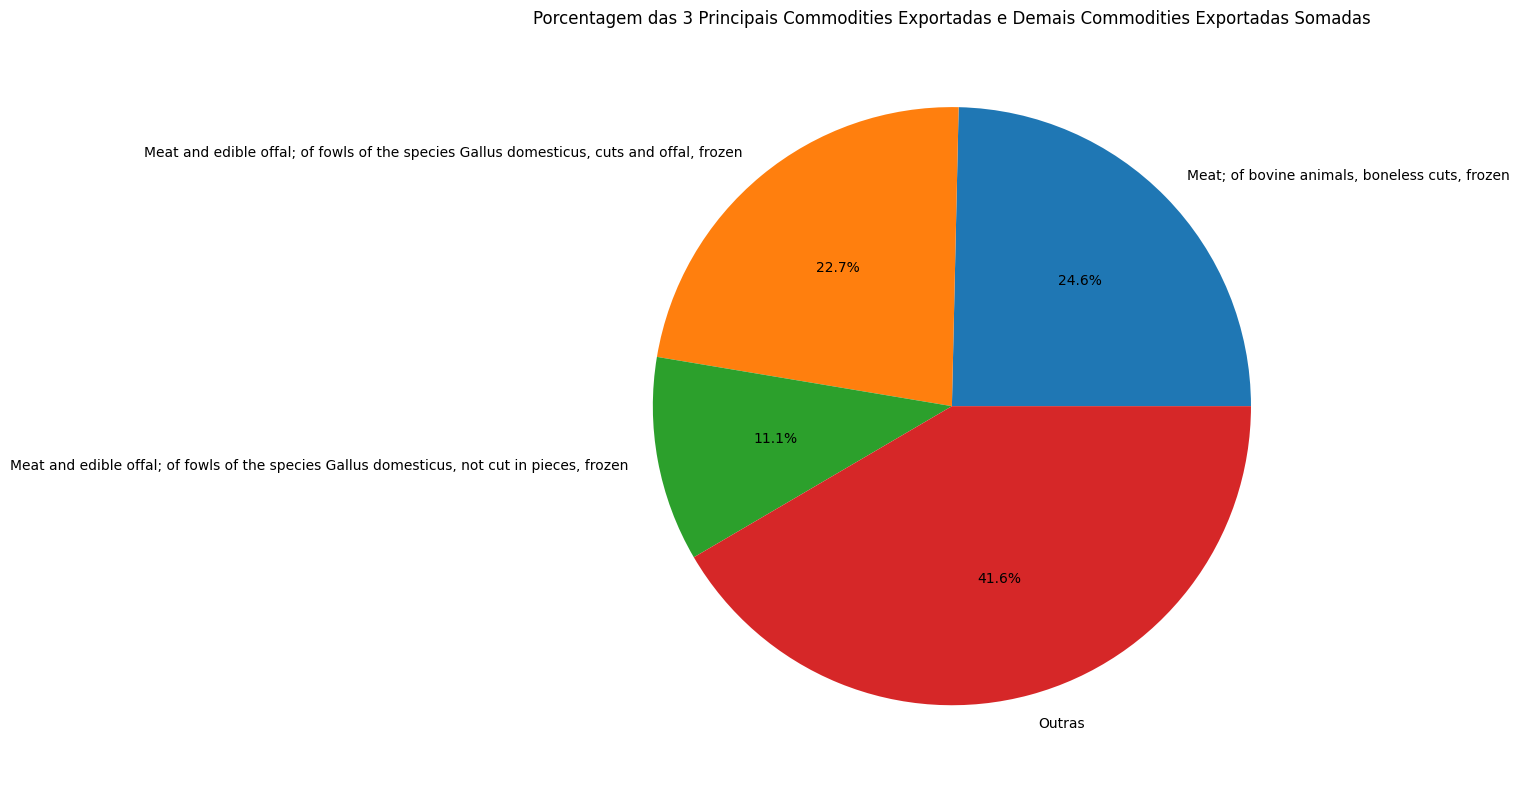

In [25]:
outras_commodities = commodities_agrupadas.loc[~commodities_agrupadas['Commodity'].isin(top_3_exportacoes['Commodity'])]
total_outras_commodities = outras_commodities['Trade (USD)'].sum()

# Calcular a porcentagem das demais commodities exportadas somadas
porcentagem_outras = (total_outras_commodities / commodities_agrupadas['Trade (USD)'].sum()) * 100

# Preparar os dados para o gráfico
labels = list(top_3_exportacoes['Commodity']) + ['Outras']
valores = list(top_3_exportacoes['Trade (USD)']) + [total_outras_commodities]

# Plotar o gráfico de pizza
plt.figure(figsize=(15, 8))
plt.pie(valores, labels=labels, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Porcentagem das 3 Principais Commodities Exportadas e Demais Commodities Exportadas Somadas')
plt.tight_layout()
plt.show()

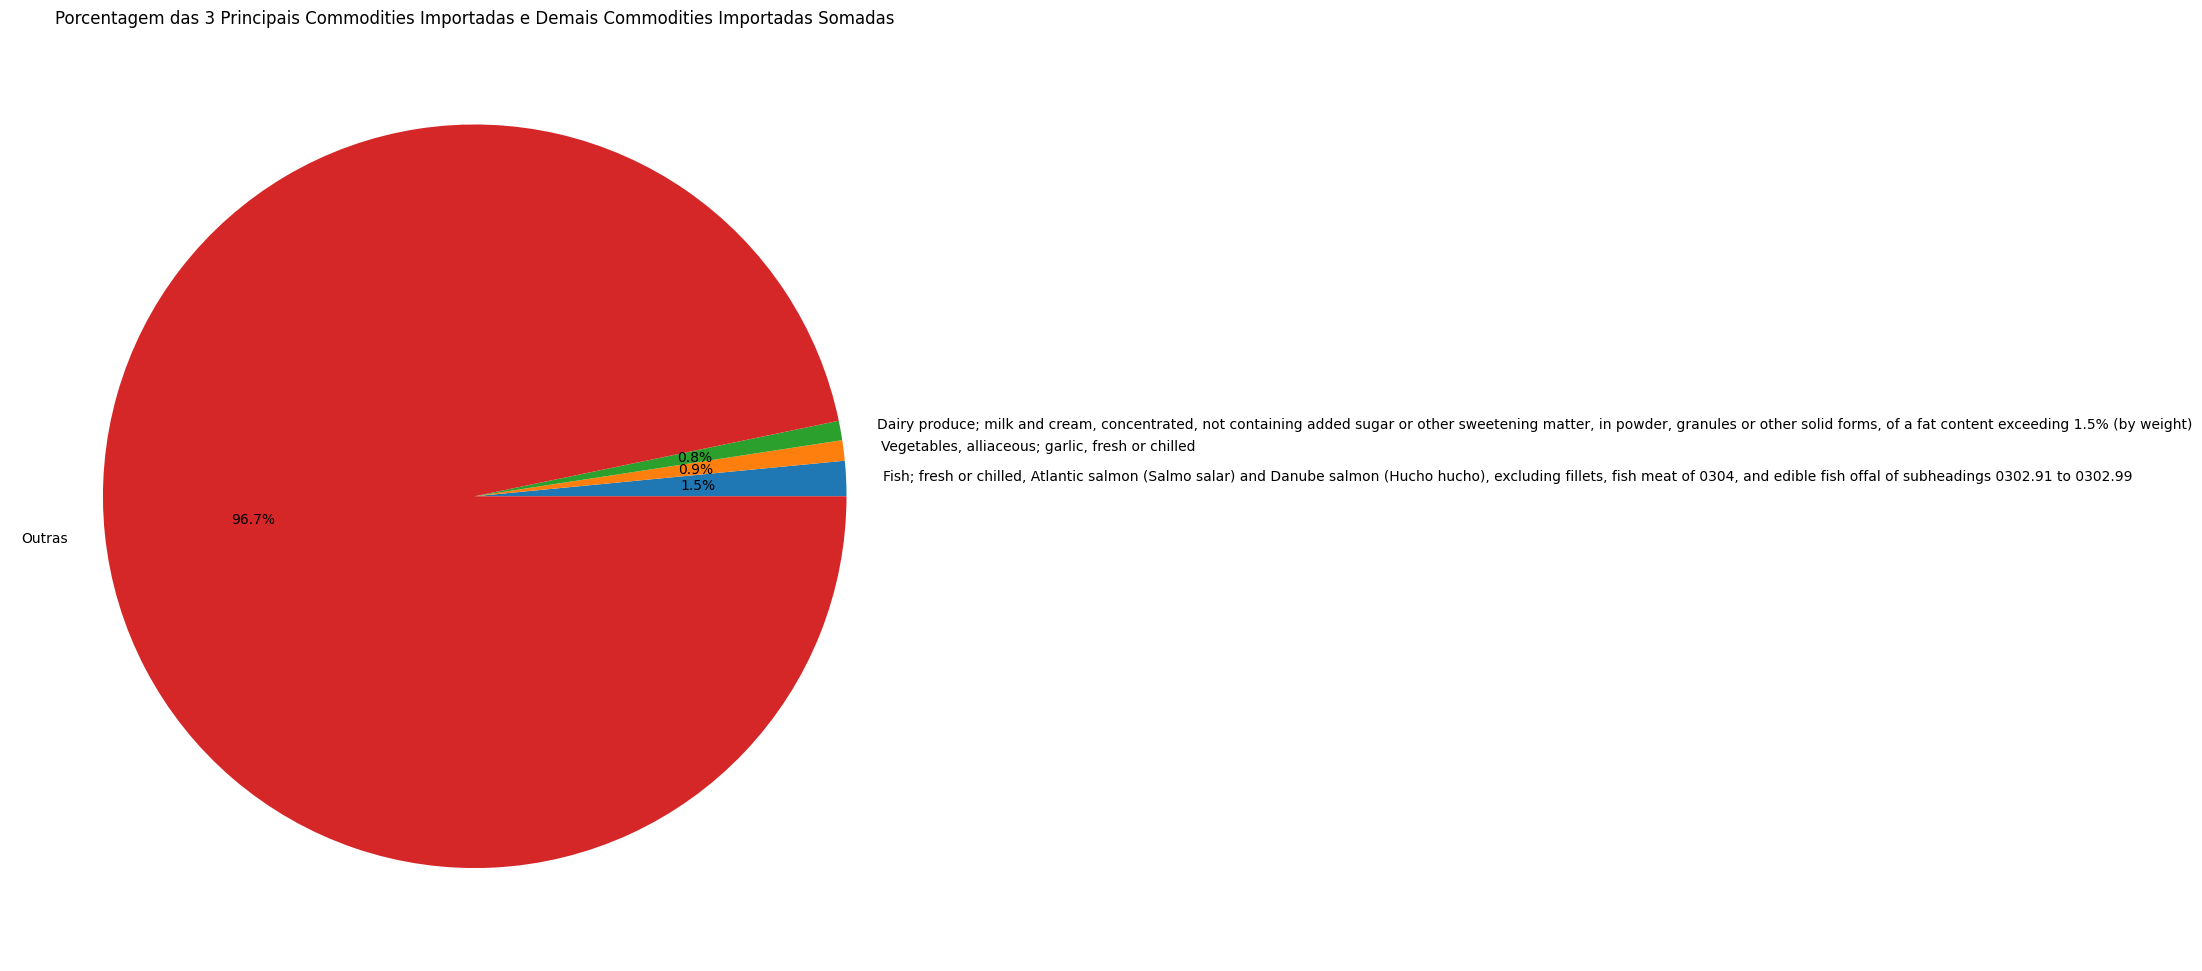

In [28]:
# Calcular o valor total das demais commodities importadas
outras_commodities = commodities_agrupadas.loc[~commodities_agrupadas['Commodity'].isin(top_3_importacoes['Commodity'])]
total_outras_commodities = outras_commodities['Trade (USD)'].sum()

# Calcular a porcentagem das demais commodities importadas somadas
porcentagem_outras = (total_outras_commodities / commodities_agrupadas['Trade (USD)'].sum()) * 100

# Preparar os dados para o gráfico
labels = list(top_3_importacoes['Commodity']) + ['Outras']
valores = list(top_3_importacoes['Trade (USD)']) + [total_outras_commodities]

# Plotar o gráfico de pizza
plt.figure(figsize=(20, 15))
plt.pie(valores, labels=labels, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Porcentagem das 3 Principais Commodities Importadas e Demais Commodities Importadas Somadas')
plt.tight_layout()
plt.show()

# 3 principais commidities em 2022

In [30]:
# Filtrar os dados para incluir apenas as informações do Brasil no ano de 2022
dados_brasil_2022 = df[(df['Country or Area'] == 'Brazil') & (df['Year'] == 2022)]

# Agrupar os dados por commodity e fluxo (exportação ou importação)
commodities_agrupadas = dados_brasil_2022.groupby(['Commodity', 'Flow'])['Trade (USD)'].sum().reset_index()

# Filtrar apenas as exportações
exportacoes = commodities_agrupadas[commodities_agrupadas['Flow'] == 'Export']

# Filtrar apenas as importações
importacoes = commodities_agrupadas[commodities_agrupadas['Flow'] == 'Import']

# Selecionar as três principais commodities exportadas e importadas
top_3_exportacoes_2022 = exportacoes.nlargest(3, 'Trade (USD)')
top_3_importacoes_2022 = importacoes.nlargest(3, 'Trade (USD)')

print("As 3 principais commodities exportadas pelo Brasil em 2022:")
print(top_3_exportacoes_2022)

print("\nAs 3 principais commodities importadas pelo Brasil em 2022:")
print(top_3_importacoes_2022)

As 3 principais commodities exportadas pelo Brasil em 2022:
                                             Commodity    Flow   Trade (USD)
339     Meat; of bovine animals, boneless cuts, frozen  Export  1.091786e+10
328  Meat and edible offal; of fowls of the species...  Export  6.744061e+09
364  Meat; of swine, n.e.c. in item no. 0203.2, frozen  Export  2.355668e+09

As 3 principais commodities importadas pelo Brasil em 2022:
                                             Commodity    Flow  Trade (USD)
184  Fish; fresh or chilled, Atlantic salmon (Salmo...  Import  753477331.0
93   Dairy produce; milk and cream, concentrated, n...  Import  349583875.0
338  Meat; of bovine animals, boneless cuts, fresh ...  Import  186058354.0


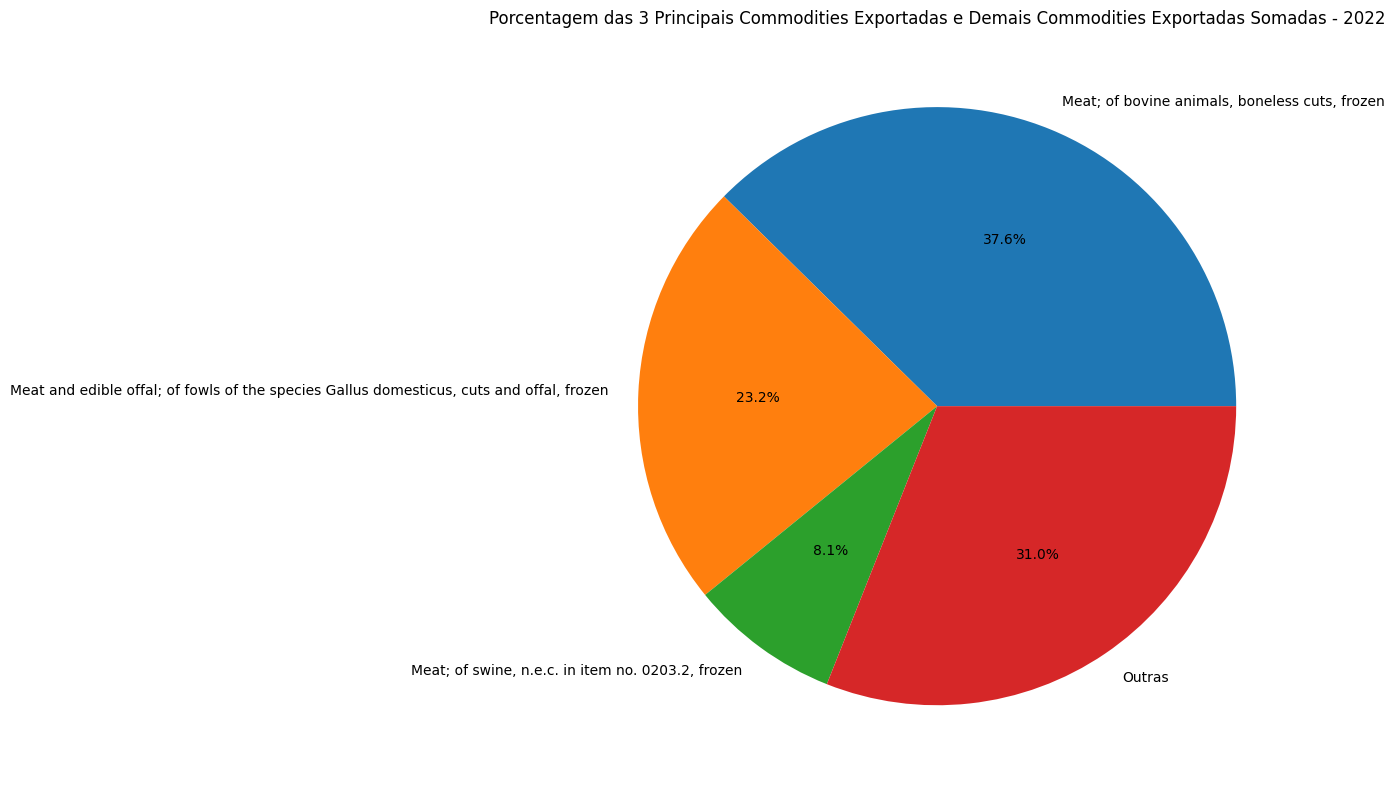

In [33]:
outras_commodities = commodities_agrupadas.loc[~commodities_agrupadas['Commodity'].isin(top_3_exportacoes_2022['Commodity'])]
total_outras_commodities = outras_commodities['Trade (USD)'].sum()

# Calcular a porcentagem das demais commodities importadas somadas
porcentagem_outras = (total_outras_commodities / commodities_agrupadas['Trade (USD)'].sum()) * 100

# Preparar os dados para o gráfico
labels = list(top_3_exportacoes_2022['Commodity']) + ['Outras']
valores = list(top_3_exportacoes_2022['Trade (USD)']) + [total_outras_commodities]

# Plotar o gráfico de pizza
plt.figure(figsize=(15, 8))
plt.pie(valores, labels=labels, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Porcentagem das 3 Principais Commodities Exportadas e Demais Commodities Exportadas Somadas - 2022')
plt.tight_layout()
plt.show()

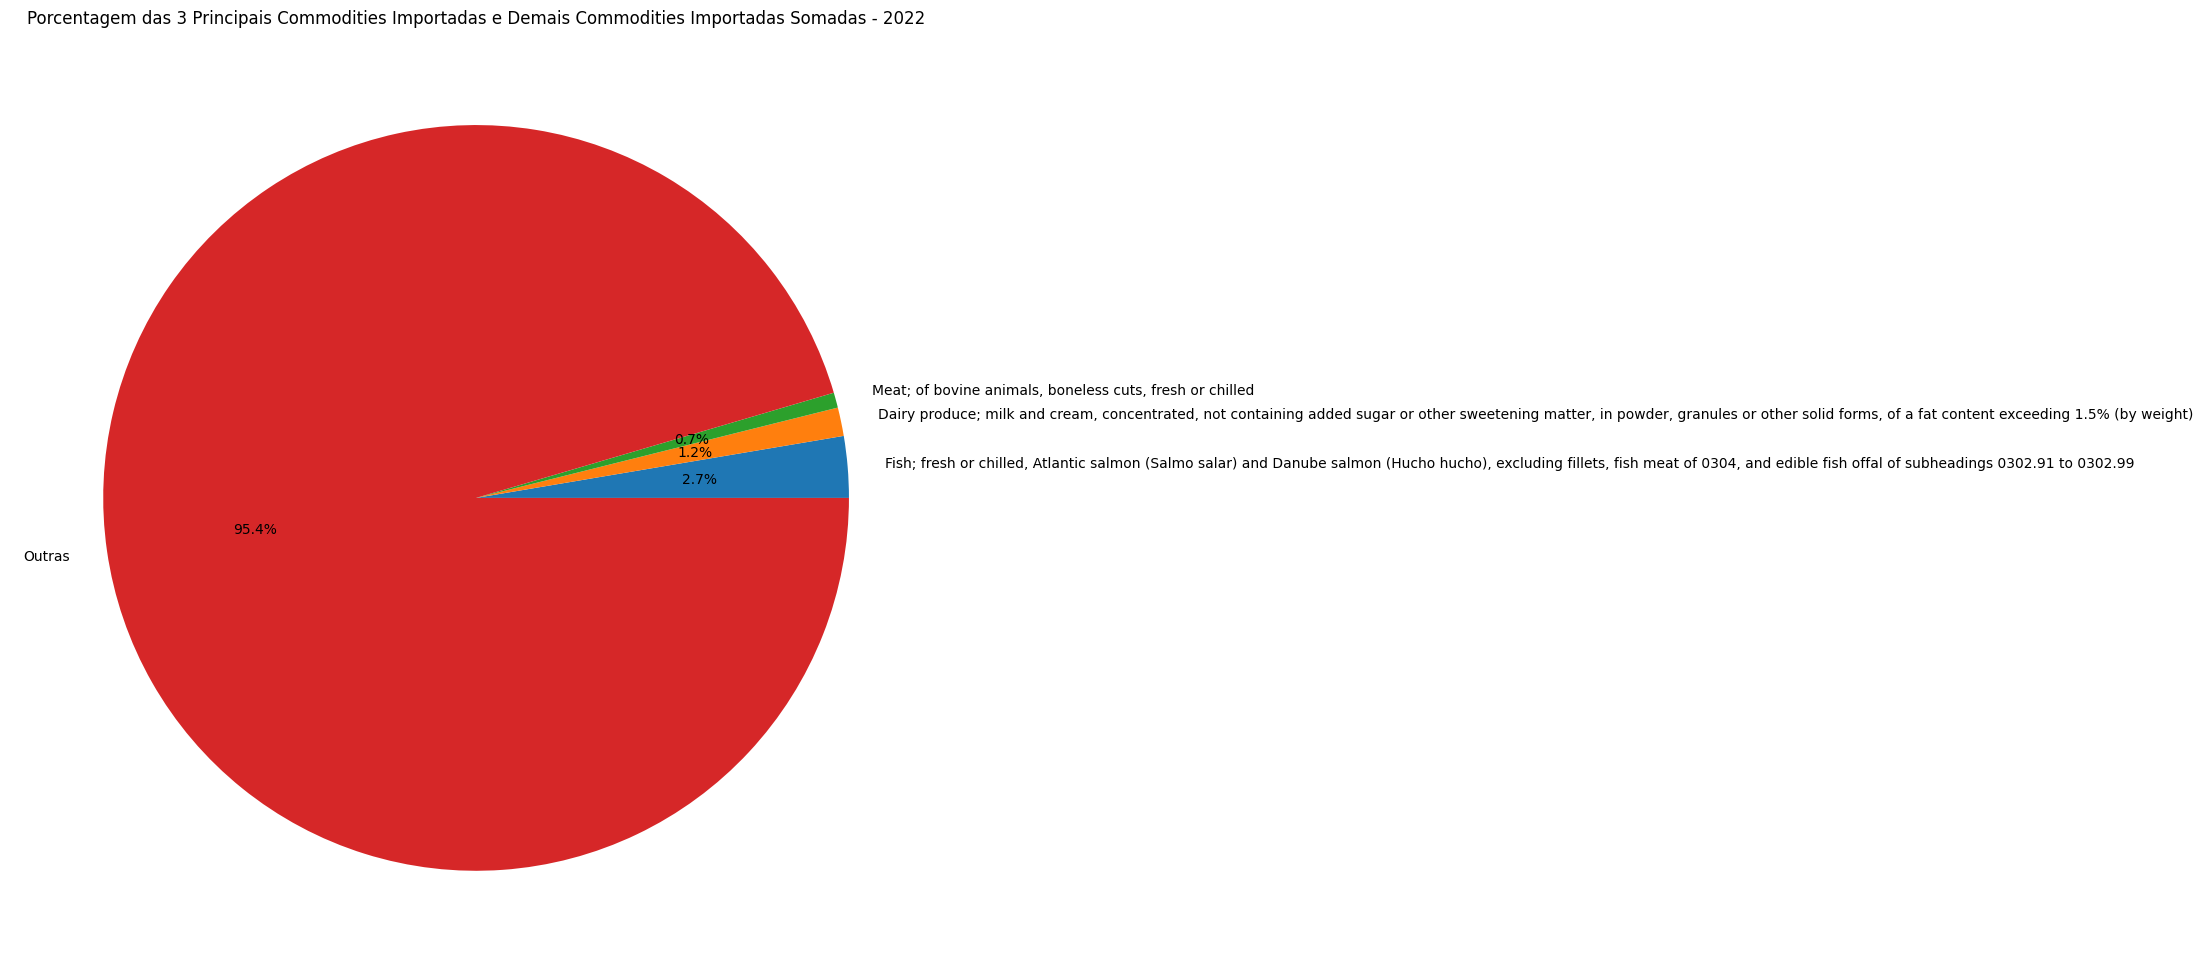

In [41]:
outras_commodities = commodities_agrupadas.loc[~commodities_agrupadas['Commodity'].isin(top_3_importacoes_2022['Commodity'])]
total_outras_commodities = outras_commodities['Trade (USD)'].sum()

# Calcular a porcentagem das demais commodities importadas somadas
porcentagem_outras = (total_outras_commodities / commodities_agrupadas['Trade (USD)'].sum()) * 100

# Preparar os dados para o gráfico
labels = list(top_3_importacoes_2022['Commodity']) + ['Outras']
valores = list(top_3_importacoes_2022['Trade (USD)']) + [total_outras_commodities]


# Plotar o gráfico de pizza
plt.figure(figsize=(20, 15))
plt.pie(valores, labels=labels, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Porcentagem das 3 Principais Commodities Importadas e Demais Commodities Importadas Somadas - 2022')


plt.tight_layout()
plt.show()